In [328]:
library(ggplot2)
library(volesti)
library(DiceDesign)
library(reticulate)
library(spatstat)
library(BBmisc)
library(MEPDF)
library(R.utils)

In [379]:
G = matrix(as.integer(rnorm(6, mean = 0, sd = 3)), nrow = 3, ncol = 2)
G = abs(G) + 1
P = Zonotope(G = G)

In [380]:
samples = 1000
rad = 5
w = 100

In [381]:
boundary_points = sample_points(P, n=10000, random_walk = list("walk" = "BRDHR"))
start.time <- Sys.time()
Billiard <- sample_points(P, n = samples, random_walk = list("walk" = 'BiW', "walk_length" = w, L = 2), distribution = 'uniform')
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
write.csv(Billiard, file = "bill.csv")

Time difference of 3.892676 secs

In [382]:
start.time <- Sys.time()
Ball <- sample_points(P, n = samples, random_walk = list("walk" = 'BaW', "walk_length" = w, BaW_rad = rad), distribution = 'uniform')
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
write.csv(Ball, file = "ball.csv")

Time difference of 2.051857 secs

In [383]:
start.time <- Sys.time()
Hit <- sample_points(P, n = samples, random_walk = list("walk" = 'RDHR', "walk_length" = w), distribution = 'uniform')
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
write.csv(Hit, file = "hr.csv")

Time difference of 4.272242 secs

In [384]:
g <-ggplot(data.frame(x = c(Billiard[1,], boundary_points[1,]),
       body = c(rep("P",samples), rep("BP",10000)), y = c(Billiard[2,],
       boundary_points[2,])) , aes(x=x, y=y)) +  geom_point(shape=10,size=1, color=c(rep("red",samples),rep("black",10000))) + 
       coord_fixed(xlim = c(-10,10), ylim = c(-10,10)) + ggtitle(sprintf("Walk Length = %s, Walk = %s", w, 'Billard Walk'))
g1 <-ggplot(data.frame(x = c(Ball[1,], boundary_points[1,]),
       body = c(rep("P",samples), rep("BP",10000)), y = c(Ball[2,],
       boundary_points[2,])) , aes(x=x, y=y)) +  geom_point(shape=10,size=1, color=c(rep("red",samples),rep("black",10000))) + 
       coord_fixed(xlim = c(-10,10), ylim = c(-10,10)) + ggtitle(sprintf("Walk Length = %s, Walk = %s", w, 'Ball Walk'))
g2 <-ggplot(data.frame(x = c(Hit[1,], boundary_points[1,]),
       body = c(rep("P",samples), rep("BP",10000)), y = c(Hit[2,],
       boundary_points[2,])) , aes(x=x, y=y)) +  geom_point(shape=10,size=1, color=c(rep("red",samples),rep("black",10000))) + 
       coord_fixed(xlim = c(-10,10), ylim = c(-10,10)) + ggtitle(sprintf("Walk Length = %s, Walk = %s", w, 'Random Direction Hit and Run'))

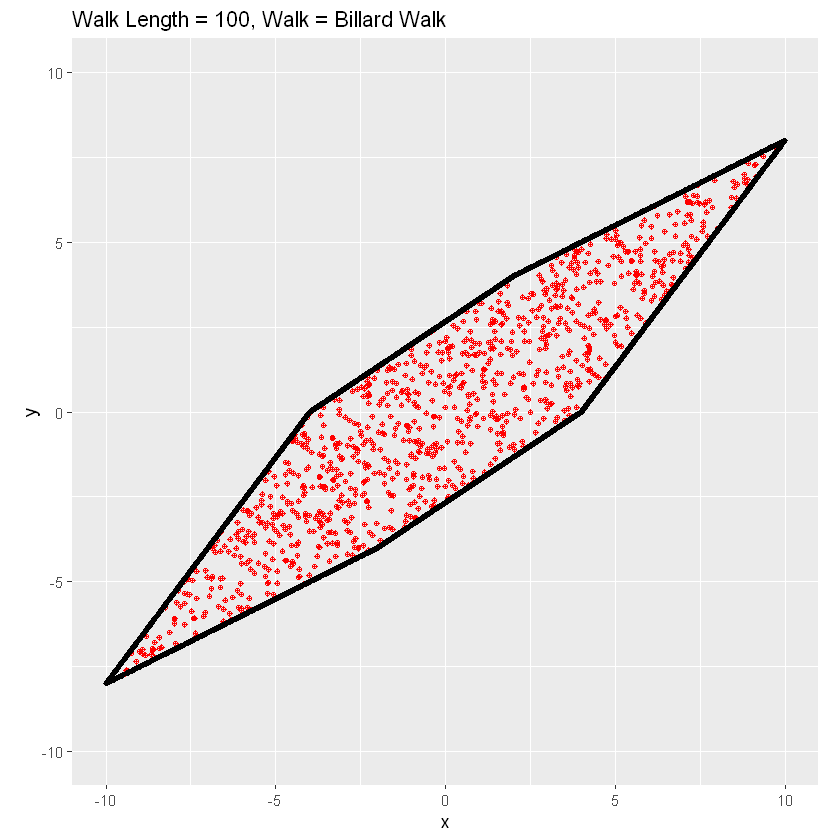

In [385]:
g

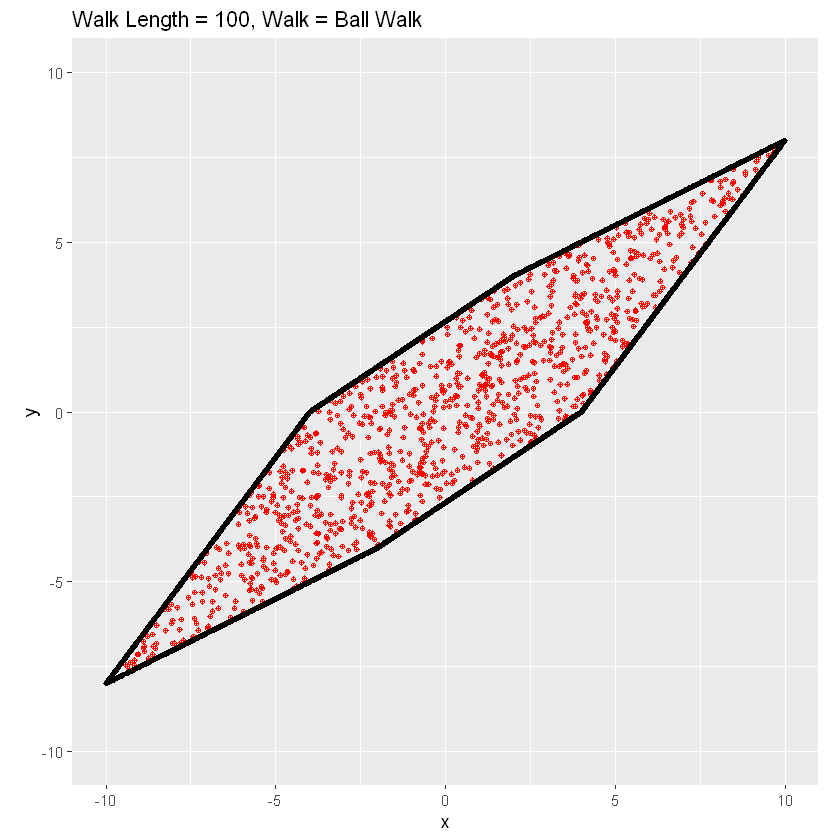

In [386]:
g1

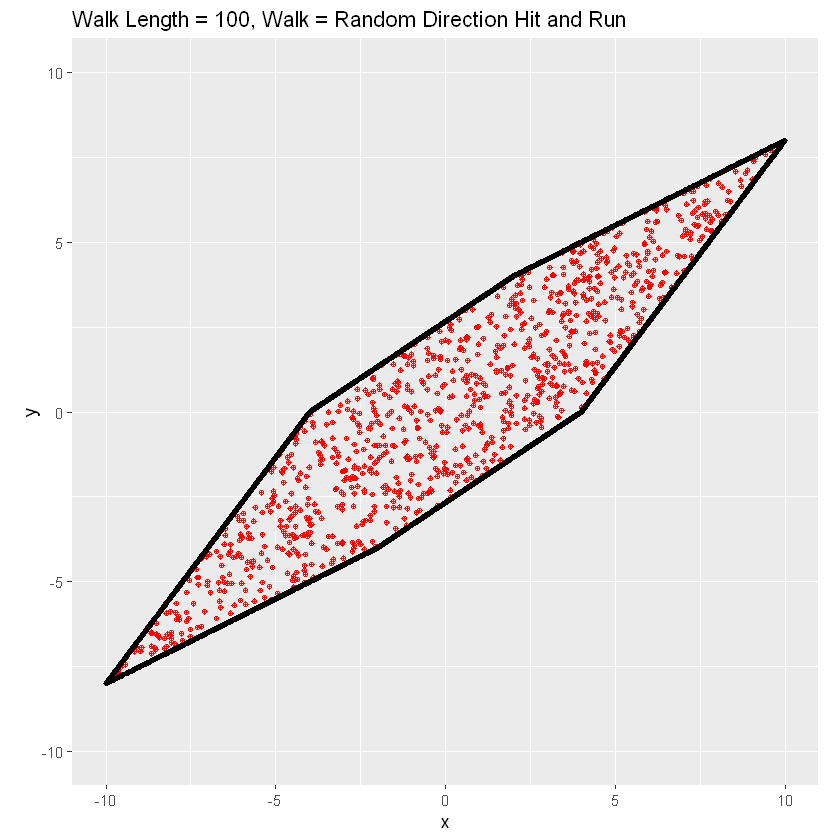

In [387]:
g2

In [388]:
Ux = runif(samples, min = -10, max = 10)
Uy = runif(samples, min = -10, max = 10)

In [389]:
printf("The Difference Between Billiard Walk and Ball Walks Samples\n")
d <- ks.test(Billiard[1,], Ball[1,])
printf("P = %.2f\n", ks.test(Billiard[1,], Ball[1,])$p.value)
printf("P = %.2f\n", ks.test(Billiard[2,], Ball[2,])$p.value)
printf("*****************************************************************************\n")
printf("The Difference Between Random Direction Hit and Run and Billiard Walk Samples\n")
printf("P = %.2f\n", ks.test(Hit[1,], Billiard[1,])$p.value)
printf("P = %.2f\n", ks.test(Hit[2,], Billiard[2,])$p.value)
printf("*****************************************************************************\n")
printf("The Difference Between Ball Walk and Random Direction Hit and Run Samples\n")
printf("P = %.2f\n", ks.test(Ball[1,], Hit[1,])$p.value)
printf("P = %.2f\n", ks.test(Ball[2,], Hit[2,])$p.value)

The Difference Between Billiard Walk and Ball Walks Samples
P = 0.65
P = 0.98
*****************************************************************************
The Difference Between Random Direction Hit and Run and Billiard Walk Samples
P = 0.07
P = 0.76
*****************************************************************************
The Difference Between Ball Walk and Random Direction Hit and Run Samples
P = 0.29
P = 0.61


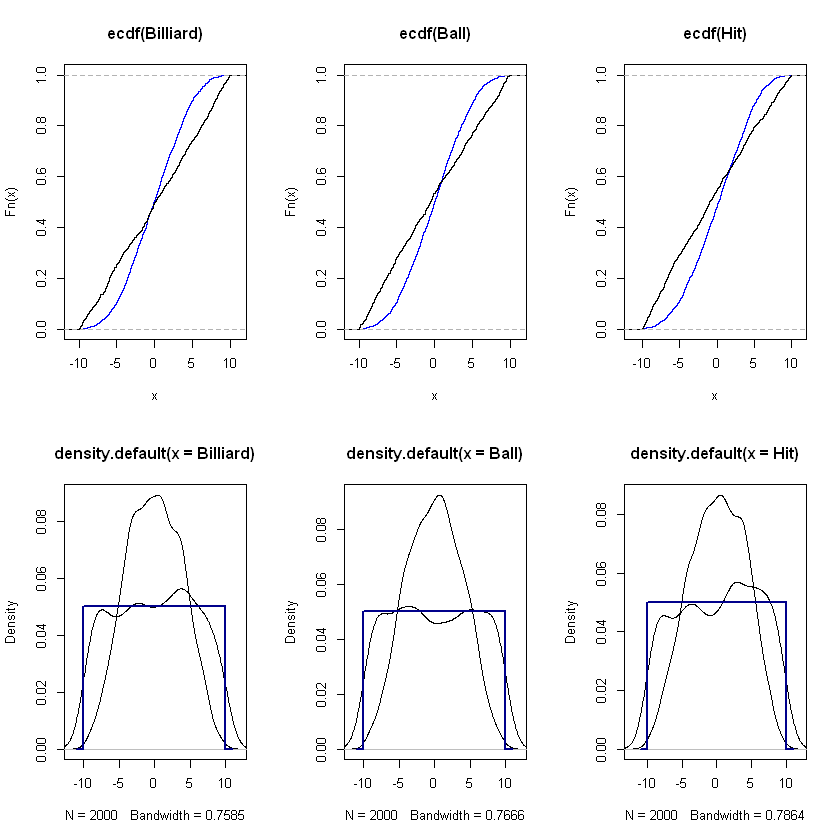

In [390]:
par(mfrow=c(2,3))
plot(ecdf(Billiard), col="blue")
lines(ecdf(runif(samples, min = -10, max = 10)))
plot(ecdf(Ball), col="blue")
lines(ecdf(runif(samples, min = -10, max = 10)))
plot(ecdf(Hit), col="blue")
lines(ecdf(runif(samples, min = -10, max = 10)))
df <- approxfun(density(Billiard))
plot(density(Billiard))
lines(density(runif(samples, min = -10, max = 10)))
curve(dunif(x, min = -10, max = 10), 
      from = -11, to = 11, 
      n = 100000, 
      col = "darkblue", 
      lwd = 2, 
      add = TRUE, 
      yaxt = "n",
      ylab = 'probability')
df <- approxfun(density(Ball))
plot(density(Ball))
lines(density(runif(samples, min = -10, max = 10)))
curve(dunif(x, min = -10, max = 10), 
      from = -11, to = 11, 
      n = 100000, 
      col = "darkblue", 
      lwd = 2, 
      add = TRUE, 
      yaxt = "n",
      ylab = 'probability')
df <- approxfun(density(Hit))
plot(density(Hit))
lines(density(runif(samples, min = -10, max = 10)))
curve(dunif(x, min = -10, max = 10), 
      from = -11, to = 11, 
      n = 100000, 
      col = "darkblue", 
      lwd = 2, 
      add = TRUE, 
      yaxt = "n",
      ylab = 'probability')

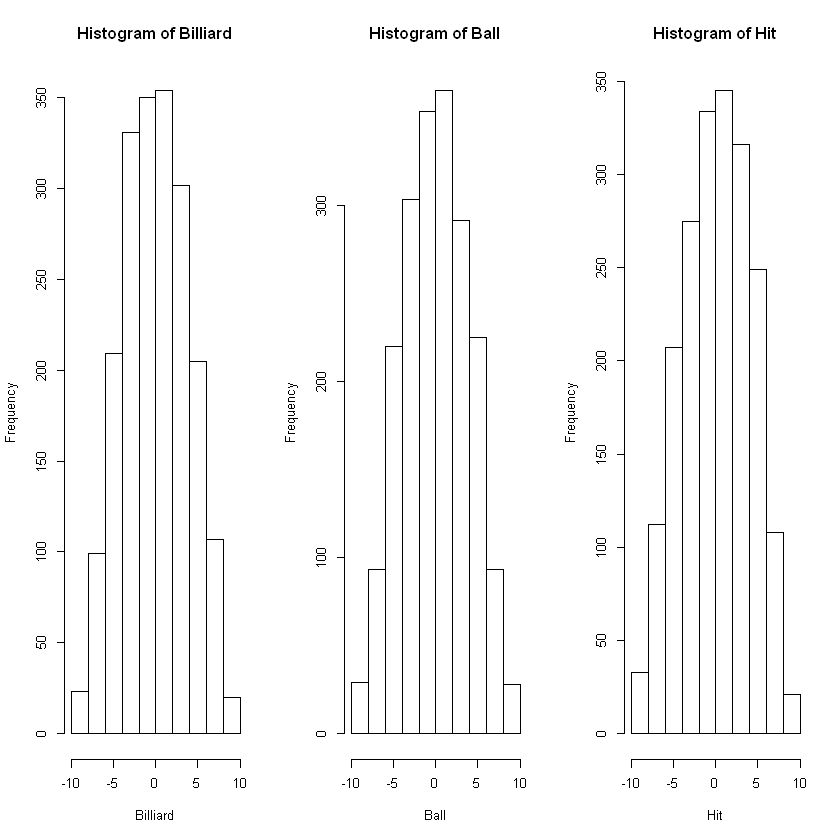

In [391]:
par(mfrow=c(1,3))
hist(Billiard)
hist(Ball)
hist(Hit)